# Workbook 01

---
The following problem set will focus on the lessons on Python and basic string manipulation. Answer the following guide questions by writing functions or code in cells that accomplish the requirements.

1. Write a function to check whether a string is a palindrome. (A palindrome is a string that reads the same forwards and backwards) **1 pt.**

2. Write a function that checks whether a number is prime or not **1 pt.**

3. Load `data/allstar.txt` and create a dictionary where the keys are the verses or chorus numbers, and the values are the chords for that part of the song. **4 pts.**
`{ "verse1": "Am, C, D, G, F, G, G, Bm", "chorus1": "C, Am, G, D, C, Am, G, D, C"..}`

4. Build a dictionary from `data/allstar.txt` where the keys are the unique words, and the values are the number of times the word appeared in the song. **4 pts.**

5. Load `Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html` and find out the ff (show the code): **10 pts.**
       - How many unique words are there?
       - List what will Rick Astley never do?
       - Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
       - Use the dictionary from above to create a word count histogram.
       
6. Create a function that takes in 3 parameters (integer n, integer a, integer b), and generates an nxn numpy matrix with random values from the range a to b inclusive. **2 pts.**
       
7. Create a 5x5 identity matrix **(1pt)**

8. Create a function that lists the first n prime numbers **(2pts)**


### Number 1

In [2]:
def check_pali(word):
    if word[::-1] == word[:]:
        print(f'The word {word} is a palindrome!')
    else:
        print(f'The word {word} is not a palindrome!')

check_pali('anna')
check_pali('hello')

The word anna is a palindrome!
The word hello is not a palindrome!


### Number 2

In [49]:
def is_prime(n):
    if n > 1:
        f = 0
        for i in range(2,n):
            if (n % i) == 0:
                f = 1
                break
    if f == 0:
        print(f'{n} is a prime number.')
    elif f == 1:
        print(f'{n} is not a prime number.')

is_prime(4)
is_prime(9)
is_prime(5)
is_prime(11)
is_prime(45)

4 is not a prime number.
9 is not a prime number.
5 is a prime number.
11 is a prime number.
45 is not a prime number.


### Number 3

In [21]:
path = 'D:/Mynt EDA/apper_eda-main/allstar.txt'
with open(path, 'r') as f:
    lines = f.read().splitlines()
lines

['[Verse 1]',
 '    G           D           Am             C',
 'Somebody once told me the world is gonna roll me',
 '    G                  D           Am   C',
 "I ain't the sharpest tool in the shed",
 '         G              D             Am',
 'She was looking kinda dumb with her finger and her',
 'C             G           D           Am       C',
 'Thumb in the shape of an "L" on her forehead',
 ' ',
 '  G                                 D',
 "Well the years start coming and they don't stop coming",
 'Am                       C',
 'Back to the rules and I hit the ground running',
 '  G                        D',
 "Didn't make sense not to live for fun",
 '    Am                      C',
 'Your brain gets smart but your head gets dumb',
 ' ',
 '  G             D',
 'So much to do so much to see',
 '   Am                            C',
 "So what's wrong with taking the back streets",
 '   G                       D',
 "You'll never know if you don't go",
 '   Am                   

In [26]:
import re
chord_list = []

for item in lines:
    if item.startswith('['):
        chord_list.append(item.strip('[]'))
    elif '   ' in item:
        item = re.sub("\s+", " ", item.strip())
        chord_list.append(item)
chord_list

['Verse 1',
 'G D Am C',
 'G D Am C',
 'G D Am',
 'C G D Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'Chorus',
 'G C C#m C',
 'G C C#m C',
 'G C C#m',
 'C G F C',
 'Verse 1',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'Chorus',
 'G C C#m C',
 'G C C#m C',
 'G C C#m',
 'C G F C',
 'G C C#m C',
 'G C C#m C',
 'G C C#m',
 'C G F C',
 'Verse 3',
 'G D Am C',
 'G D Am C',
 'G D Am C',
 'G D Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'G D',
 'Am C',
 'Chorus',
 'G C C#m C',
 'G C C#m C',
 'G C C#m',
 'C G F C']

In [35]:
chord_dict = {}
verses = []
chorus = []

def check_chord(chord_line, dict_key):
    for chord in chord_line.split():
        if chord not in chord_dict[dict_key]:
            chord_dict[dict_key] = chord_dict[dict_key] + f' {chord}'

for line in chord_list:
    first_word = line.split()[0]
    if line.startswith('Verse'):
        count = 1 
        key = f'{first_word}{count}'
        while key in chord_dict.keys():
            count += 1
            key = f'{first_word}{count}'
        chord_dict[key] = ''
        chord_list[chord_list.index(line)] = key
    if line.startswith('Chorus'):
        count = 1 
        key = f'{first_word}{count}'
        while key in chord_dict.keys():
            count += 1
            key = f'{first_word}{count}'
        chord_dict[key] = ''
        chord_list[chord_list.index(line)] = key

print(chord_dict)
print(chord_list)

{'Verse1': '', 'Chorus1': '', 'Verse2': '', 'Chorus2': '', 'Verse3': '', 'Chorus3': ''}
['Verse1', 'G D Am C', 'G D Am C', 'G D Am', 'C G D Am C', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'Chorus1', 'G C C#m C', 'G C C#m C', 'G C C#m', 'C G F C', 'Verse2', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'Chorus2', 'G C C#m C', 'G C C#m C', 'G C C#m', 'C G F C', 'G C C#m C', 'G C C#m C', 'G C C#m', 'C G F C', 'Verse3', 'G D Am C', 'G D Am C', 'G D Am C', 'G D Am C', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'G D', 'Am C', 'Chorus3', 'G C C#m C', 'G C C#m C', 'G C C#m', 'C G F C']


In [39]:
for line in chord_list:
    if line.startswith('Verse') | line.startswith('Chorus'):
        key = line
    else:
        check_chord(line,key)

print(f'Chords found per verse/chorus: \n{chord_dict}')

Chords found per verse/chorus: 
{'Verse1': ' G D Am C', 'Chorus1': ' G C C#m F', 'Verse2': ' G D Am C', 'Chorus2': ' G C C#m F', 'Verse3': ' G D Am C', 'Chorus3': ' G C C#m F'}


### Number 4

In [63]:
text_file = open(path, 'r')
text = text_file.read()

#cleaning
text = text.lower()
words = text.split()
words = [word.strip('.,!;()[]') for word in words]

#finding unique
unique = {}

for word in words:
    if word not in unique.keys():
        unique[word] = 1
    else:
        count = unique[word]
        unique[word] = count + 1

#print
print(unique)

{'verse': 3, '1': 2, 'g': 36, 'd': 20, 'am': 20, 'c': 48, 'somebody': 2, 'once': 2, 'told': 1, 'me': 2, 'the': 26, 'world': 1, 'is': 6, 'gonna': 1, 'roll': 1, 'i': 8, "ain't": 1, 'sharpest': 1, 'tool': 1, 'in': 3, 'shed': 1, 'she': 1, 'was': 1, 'looking': 1, 'kinda': 1, 'dumb': 3, 'with': 3, 'her': 3, 'finger': 1, 'and': 12, 'thumb': 1, 'shape': 1, 'of': 1, 'an': 5, '"l"': 1, 'on': 10, 'forehead': 1, 'well': 3, 'years': 2, 'start': 2, 'coming': 4, 'they': 3, "don't": 6, 'stop': 2, 'back': 4, 'to': 10, 'rules': 2, 'hit': 2, 'ground': 2, 'running': 2, "didn't": 2, 'make': 2, 'sense': 2, 'not': 2, 'live': 2, 'for': 3, 'fun': 2, 'your': 8, 'brain': 2, 'gets': 5, 'smart': 2, 'but': 4, 'head': 2, 'so': 7, 'much': 4, 'do': 2, 'see': 2, "what's": 2, 'wrong': 2, 'taking': 2, 'streets': 2, "you'll": 4, 'never': 5, 'know': 2, 'if': 4, 'you': 7, 'go': 6, 'shine': 2, 'glow': 2, 'chorus': 3, 'c#m': 12, 'hey': 8, 'now': 9, "you're": 9, 'all': 9, 'star': 8, 'get': 15, 'game': 4, 'play': 4, 'a': 8, 'ro

### Number 5

In [45]:
!conda install -c anaconda lxml

Solving environment: ...working... done

# All requested packages already installed.



In [ ]:
'''
- How many unique words are there?
- List what will Rick Astley never do?
- Write a function that lists all the unique words and counts the num of occurences. Output the result as a dictionary similar to **Item 4.**
- Use the dictionary from above to create a word count histogram.
'''

In [1]:
from bs4 import BeautifulSoup
import string

with open('Rick Astley - Never Gonna Give You Up Lyrics _ AZLyrics.com.html', 'r') as f:
    contents = f.read()
    soup = BeautifulSoup(contents, 'html.parser')
data = soup.find_all('div')[19].get_text()
cleaned = data.translate(str.maketrans('','', string.punctuation)).lower()
cleaned = [line for line in cleaned.split('\n') if line!='']
cleaned


['were no strangers to love',
 'you know the rules and so do i',
 'a full commitments what im thinking of',
 'you wouldnt get this from any other guy',
 'i just wanna tell you how im feeling',
 'gotta make you understand',
 'never gonna give you up',
 'never gonna let you down',
 'never gonna run around and desert you',
 'never gonna make you cry',
 'never gonna say goodbye',
 'never gonna tell a lie and hurt you',
 'weve known each other for so long',
 'your hearts been aching but',
 'youre too shy to say it',
 'inside we both know whats been going on',
 'we know the game and were gonna play it',
 'and if you ask me how im feeling',
 'dont tell me youre too blind to see',
 'never gonna give you up',
 'never gonna let you down',
 'never gonna run around and desert you',
 'never gonna make you cry',
 'never gonna say goodbye',
 'never gonna tell a lie and hurt you',
 'never gonna give you up',
 'never gonna let you down',
 'never gonna run around and desert you',
 'never gonna make you 

In [4]:
text = ' '.join(cleaned)
text

'were no strangers to love you know the rules and so do i a full commitments what im thinking of you wouldnt get this from any other guy i just wanna tell you how im feeling gotta make you understand never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you weve known each other for so long your hearts been aching but youre too shy to say it inside we both know whats been going on we know the game and were gonna play it and if you ask me how im feeling dont tell me youre too blind to see never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you never gonna give you up never gonna let you down never gonna run around and desert you never gonna make you cry never gonna say goodbye never gonna tell a lie and hurt you ooh give you up ooh give you up never gonna give 

In [86]:
words = text.split()
unique = set(words)
print(f'There are {len(unique)} unique words in Never Gonna Give You Up')

There are 78 unique words in Never Gonna Give You Up


In [89]:
never_list = []

for line in cleaned:
    if line.startswith('never'):
        never_list.append(line)
never_list

print(f'Things Rick Astley won\'t do: \n {set(never_list)}')

Things Rick Astley won't do: 
 {'never gonna let you down', 'never gonna run around and desert you', 'never gonna give you up', 'never gonna make you cry', 'never gonna tell a lie and hurt you', 'never gonna give never gonna give', 'never gonna say goodbye'}


In [7]:
unique_roll = {}

for word in text.split():
    if word not in unique_roll.keys():
        unique_roll[word] = 1
    else:
        count = unique_roll[word]
        unique_roll[word] = count + 1

print(f'Unique Words in Rick Astley\'s "Never Gonna Give You Up": \n {unique_roll}')

Unique Words in Rick Astley's "Never Gonna Give You Up": 
 {'were': 3, 'no': 1, 'strangers': 1, 'to': 4, 'love': 1, 'you': 41, 'know': 5, 'the': 3, 'rules': 1, 'and': 16, 'so': 3, 'do': 1, 'i': 3, 'a': 7, 'full': 1, 'commitments': 1, 'what': 1, 'im': 4, 'thinking': 1, 'of': 1, 'wouldnt': 1, 'get': 1, 'this': 1, 'from': 1, 'any': 1, 'other': 3, 'guy': 1, 'just': 2, 'wanna': 2, 'tell': 9, 'how': 3, 'feeling': 3, 'gotta': 2, 'make': 8, 'understand': 2, 'never': 40, 'gonna': 42, 'give': 14, 'up': 10, 'let': 6, 'down': 6, 'run': 6, 'around': 6, 'desert': 6, 'cry': 6, 'say': 8, 'goodbye': 6, 'lie': 6, 'hurt': 6, 'weve': 2, 'known': 2, 'each': 2, 'for': 2, 'long': 2, 'your': 2, 'hearts': 2, 'been': 4, 'aching': 2, 'but': 2, 'youre': 3, 'too': 3, 'shy': 2, 'it': 4, 'inside': 2, 'we': 4, 'both': 2, 'whats': 2, 'going': 2, 'on': 2, 'game': 2, 'play': 2, 'if': 1, 'ask': 1, 'me': 2, 'dont': 1, 'blind': 1, 'see': 1, 'ooh': 2}


In [9]:
sorted_unique = {k: v for k, v in sorted(unique_roll.items(), key=lambda item: item[1], reverse = True)}
print(sorted_unique)

{'gonna': 42, 'you': 41, 'never': 40, 'and': 16, 'give': 14, 'up': 10, 'tell': 9, 'make': 8, 'say': 8, 'a': 7, 'let': 6, 'down': 6, 'run': 6, 'around': 6, 'desert': 6, 'cry': 6, 'goodbye': 6, 'lie': 6, 'hurt': 6, 'know': 5, 'to': 4, 'im': 4, 'been': 4, 'it': 4, 'we': 4, 'were': 3, 'the': 3, 'so': 3, 'i': 3, 'other': 3, 'how': 3, 'feeling': 3, 'youre': 3, 'too': 3, 'just': 2, 'wanna': 2, 'gotta': 2, 'understand': 2, 'weve': 2, 'known': 2, 'each': 2, 'for': 2, 'long': 2, 'your': 2, 'hearts': 2, 'aching': 2, 'but': 2, 'shy': 2, 'inside': 2, 'both': 2, 'whats': 2, 'going': 2, 'on': 2, 'game': 2, 'play': 2, 'me': 2, 'ooh': 2, 'no': 1, 'strangers': 1, 'love': 1, 'rules': 1, 'do': 1, 'full': 1, 'commitments': 1, 'what': 1, 'thinking': 1, 'of': 1, 'wouldnt': 1, 'get': 1, 'this': 1, 'from': 1, 'any': 1, 'guy': 1, 'if': 1, 'ask': 1, 'dont': 1, 'blind': 1, 'see': 1}


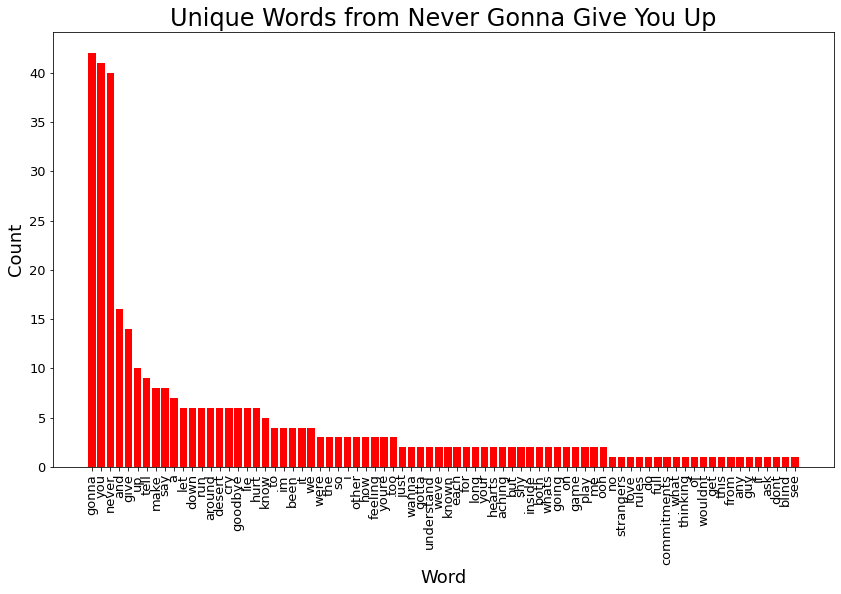

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
plt.bar(list(sorted_unique.keys()), sorted_unique.values(), color='r')
plt.title('Unique Words from Never Gonna Give You Up', size=24)
plt.xticks(rotation='vertical', size = 13)
plt.yticks(size = 13)
plt.xlabel('Word', size=18)
plt.ylabel('Count', size=18)
plt.show()

### Number 6

In [37]:
# Create a function that takes in 3 parameters (integer n, integer a, integer b), 
# and generates an nxn numpy matrix with random values from the range a to b inclusive. 2 pts.
import numpy as np
def gen_mat(n, a, b):
    random_matrix = np.random.randint(a,(b+1),(n,n))
    print(random_matrix)

gen_mat(4,0,5)


[[2 4 0 5]
 [4 3 0 2]
 [1 4 3 1]
 [0 0 5 5]]


### Number 7

In [23]:
import numpy as np
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

### Number 8

In [56]:
def check_prime(n):
    f = 0
    if n > 1:
        for i in range(2,n):
            if (n % i) == 0:
                f = 1
                break
    else:
        f = 1
    if f == 0:
        return True
    elif f == 1:
        return False

def print_prime(n):
    prime_list = [n for n in range(n+1) if check_prime(n)]
    print(prime_list)
    
print_prime(19)

[2, 3, 5, 7, 11, 13, 17, 19]
